<a href="https://colab.research.google.com/github/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning** is the process of **building an analytical model** by finding **mathematical relationships** and **hidden patterns within large amounts of data** to make **predictions** or **decisions** on new, **unseen data**.

Machine Learning is a two-phase computational process where a system first learns patterns from a historical dataset and then uses those learned patterns to make decisions or predictions on new, unseen data.

**Phase 1 : Training Phase (Model Creation)**

**Phase 2: Inference Phase (Deployment and Use)**

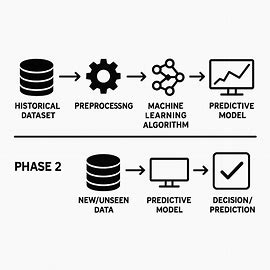

**Types of Machine Learning**

Machine learning models are typically categorized based on the nature of the training data and the method used for learning.

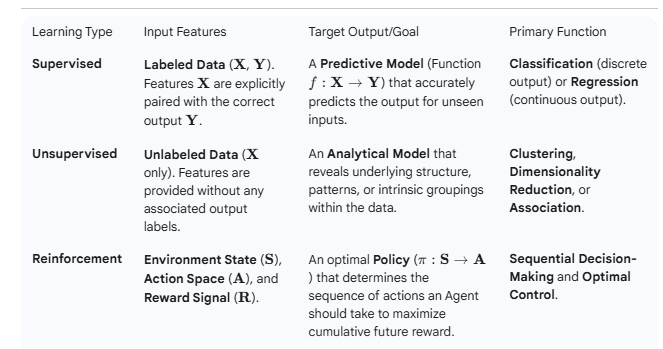


**Supervised Learning**

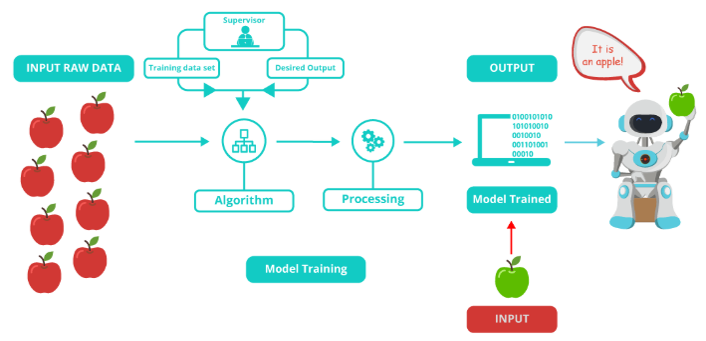

**Unsupervised Learning**

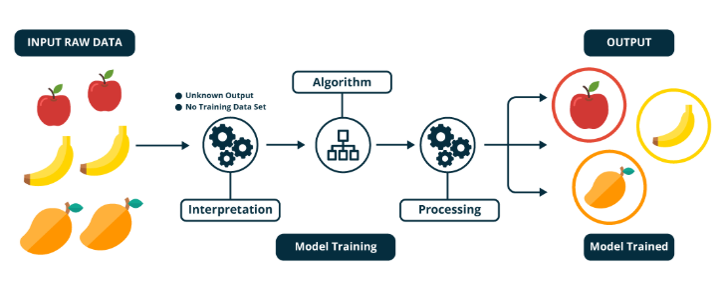

**Reinforcement Learning**

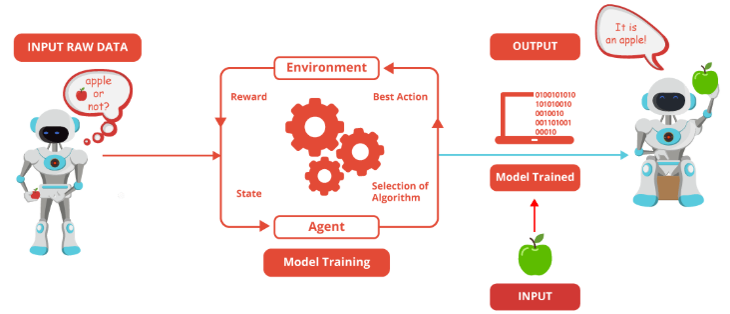

**Learning Path**

**Maths Skill**
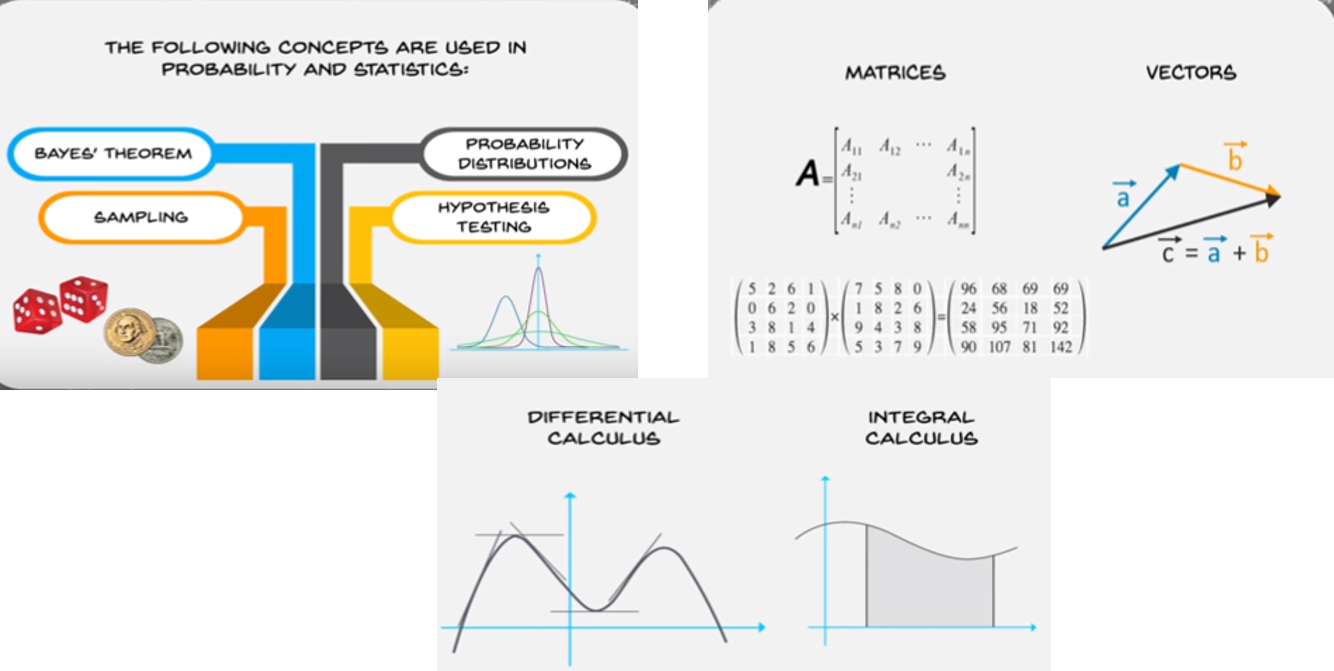

**Learning Path**

**Programming Skill**

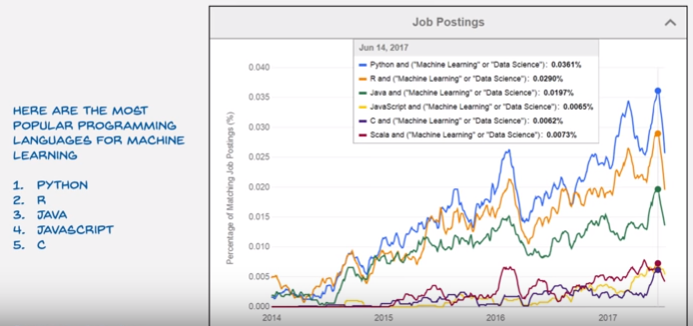

**Learning Path**

**Data Engineering Skill**

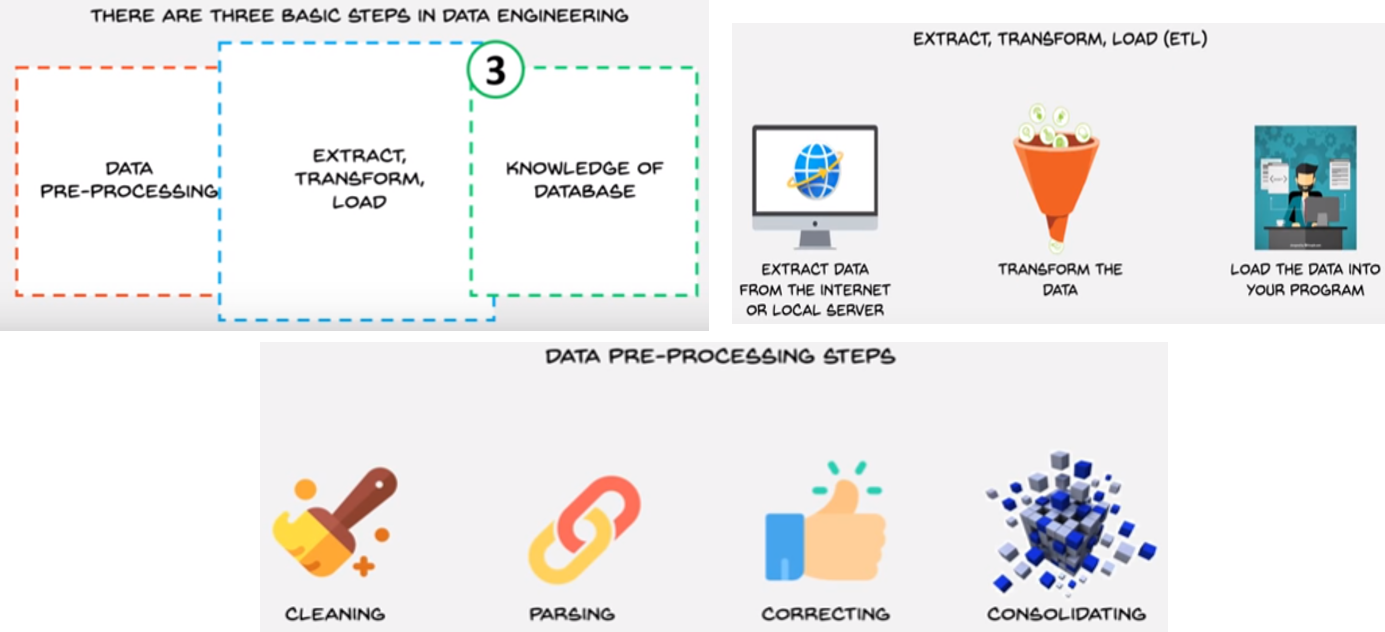

**Learning Path**

**Machine Learning Algorithms**

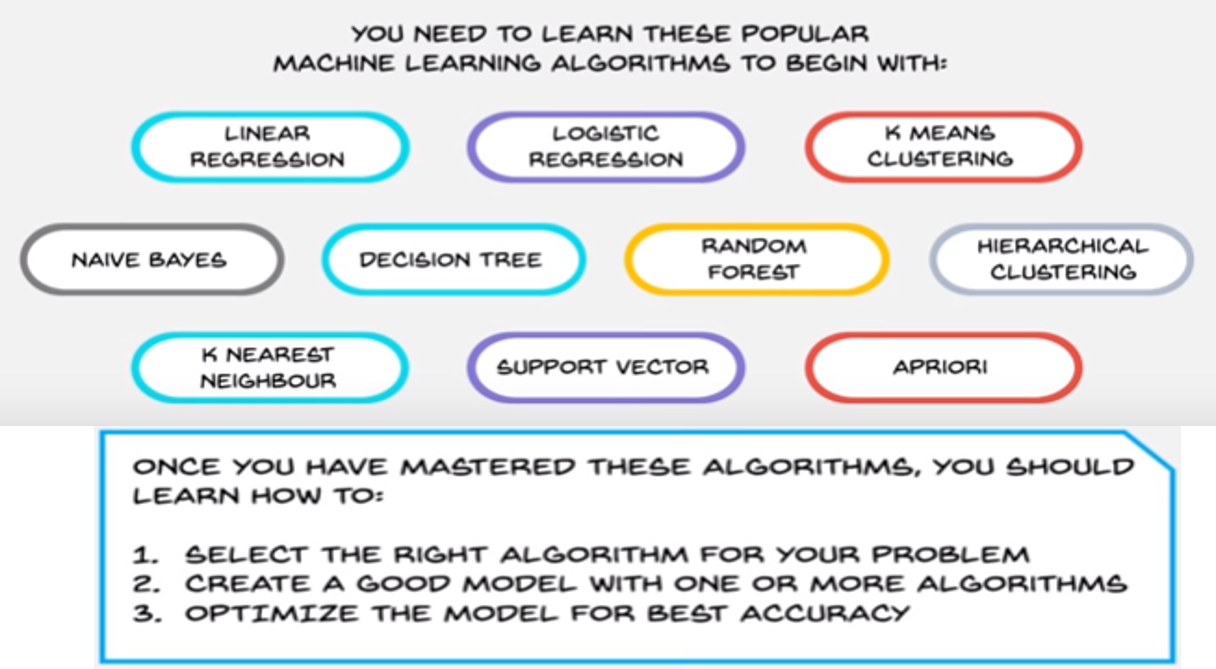

**Learning Path**

**Machine Learning Frameworks**

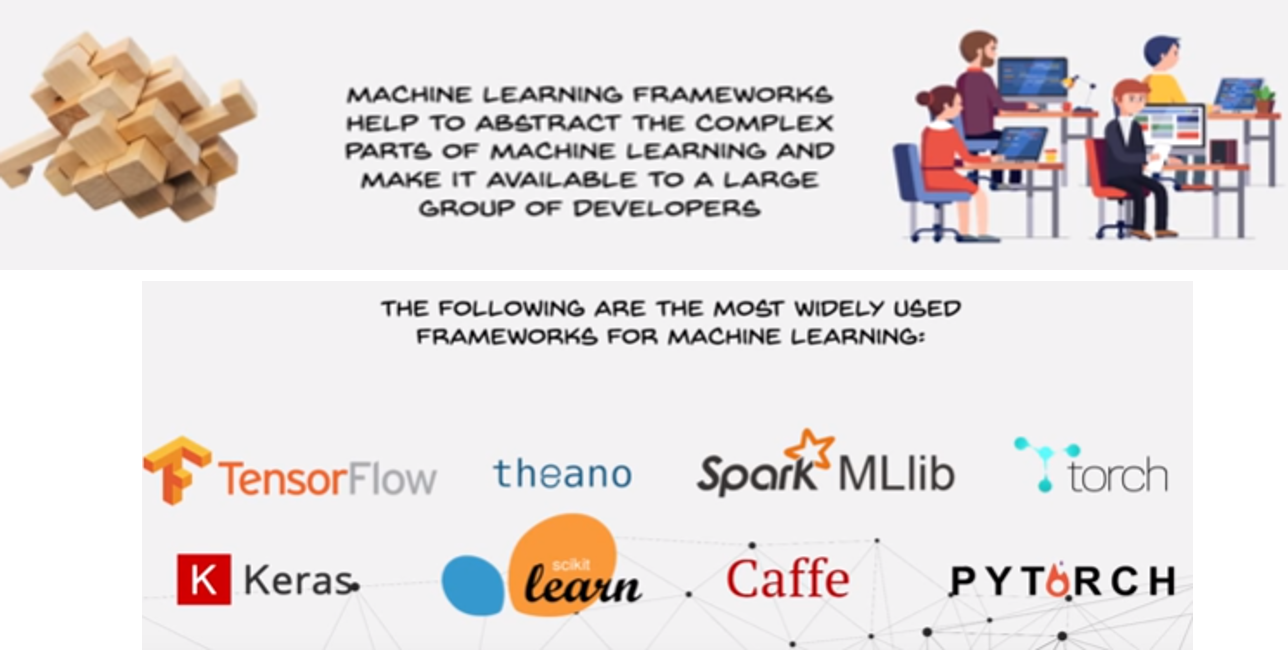

**How to Develop Machine Learning AI System**


1.  **Problem Definition**: Clerly state the business problem to be solved
2. **Data Collection** : Gather relevant data from different sources


1.  **Data Preprocessing**: prepare data ready for training the data
2.   **Model Training** : Feed the preprocessed data into ML Algorithm to build the Model



1.  **Model Evaluation**: Evaluate the Model performance and accuracy using metrics
2.   **Deployment and improvement** : integrating the trained model into production system and continuously refining it









**Applying Machine Learning Process on** Predicting Titanic Passenger Survivual or Not

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set visualization style
sns.set(style='whitegrid', palette='muted')

#**Load Dataset**

In [2]:
url = "https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Exploration**

In [3]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Dataset Shape: (909, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB
None

Summary Statistics:
        PassengerId    Survived Pclass                               Name  \
count    909.000000  909.000000    909                                909   
unique          NaN     

**Check missing values**

In [4]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int64


**Check duplicates**

In [5]:
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 10


**Data Visualization - Understanding Data Distribution**

histogram: understand the distribution
Boxplot : indetifiy outliers
Scatter plot : r/n ship b/n features and predictor(target varible)
Correction heatmap

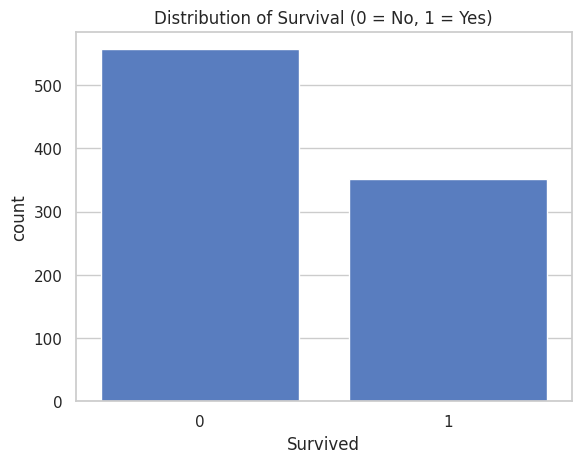

In [6]:
# Survival Distribution
sns.countplot(x='Survived', data=df)
plt.title("Distribution of Survival (0 = No, 1 = Yes)")
plt.show()

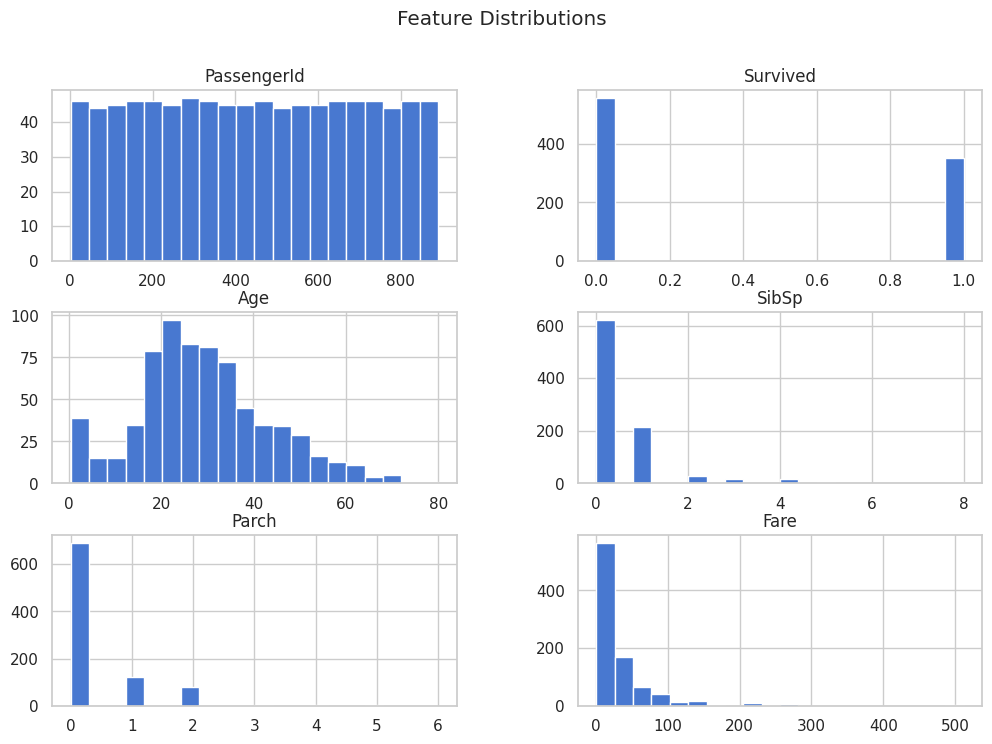

In [7]:
# Distribution of numerical columns
df.hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

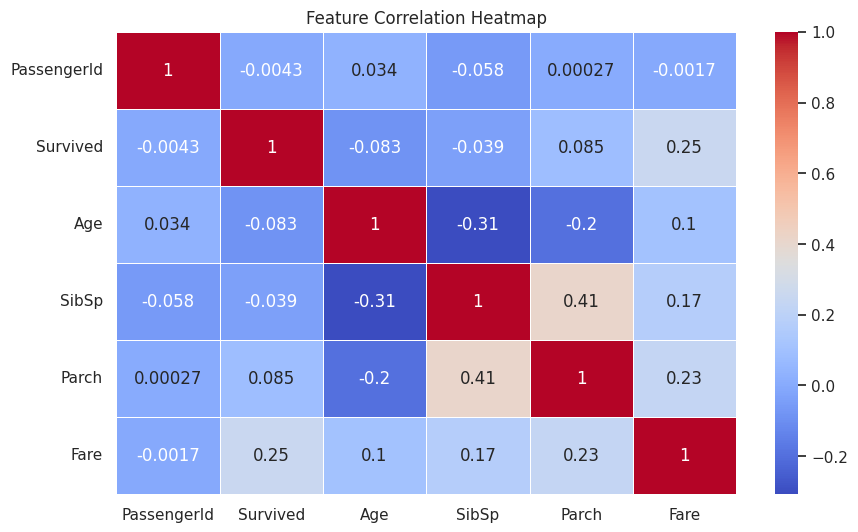

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

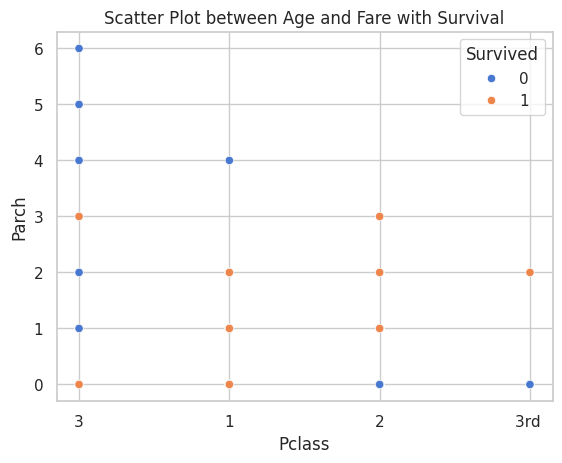

In [9]:
# Scatter between features (Age vs Fare)
sns.scatterplot(x='Pclass', y='Parch', hue='Survived', data=df)
plt.title("Scatter Plot between Age and Fare with Survival")
plt.show()

**Data Preprocessing and Cleaning**

In [10]:
# Handling Missing Values
print("Before Imputation:", df.isnull().sum())

Before Imputation: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int64


In [11]:

# Fill 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Filling Missing : Mode Categorical Columns
mean, Median, KNNimputer : numeric columns

In [12]:
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,21.892189
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,1.980198


handling missing value : less than 50%  


**How KNN Works (Step-by-Step for Classification)**



1.   Choose the number of neighbors, K
2.   Calculate the distance

    Euclidean distance (most common)
    d=sqrt((x1​−y1​)2+(x2​−y2​)2)


3.   Find the K nearest neighbors:Sort all distances and pick the K smallest (closest) samples.
4.   Perform Majority Voting


1.   Assign the class label







​

In [13]:

from sklearn.impute import KNNImputer


In [14]:
# Use KNN Imputer for Age and Fare
imputer = KNNImputer(n_neighbors=5)
df[['Age','Fare']] = imputer.fit_transform(df[['Age','Fare']])

In [15]:
print("After Imputation:", df.isnull().sum())

After Imputation: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         0
dtype: int64


In [16]:
df.drop(columns=['Cabin'],inplace=True,errors='ignore')

In [17]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
# 6.2 Handling Duplicates
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:", df.shape)

After Removing Duplicates: (899, 11)


In [19]:
# 6.3 Handling Inconsistencies in categorical columns
df['Sex'] = df['Sex'].str.lower().replace({'femalee':'female','mal':'male','Male':'male','Female':'female'})
df['Embarked']=df['Embarked'].replace({'Southmpton':'S','Queenstown':'Q','Cherbourg':'C','cherbourg':'C'})
df['Embarked'] = df['Embarked'].str.lower()


**Feature Engineering**

In [20]:
# Extracting Title from Name as new feature
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Col':7, 'Major':8, 'Mlle':2, 'Countess':3, 'Mme':3, 'Don':1, 'Lady':3, 'Sir':1, 'Jonkheer':1, 'Capt':7}
df['Title'] = df['Title'].map(title_map).fillna(0)

In [ ]:
# df.head()
df.boxplot(column='Age', by='Title', grid=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,s,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,s,1.0


In [22]:
# --- Fix Pclass column if it contains strings like '1st', '2nd', '3rd ' ---
df['Pclass'] = df['Pclass'].astype(str)              # ensure string type
df['Pclass'] = df['Pclass'].str.replace('st', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('nd', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('rd', '', regex=False)
df['Pclass'] = df['Pclass'].str.strip()              # remove any spaces
df['Pclass'] = df['Pclass'].astype(int)              # convert to numeric

In [23]:
from sklearn.preprocessing import LabelEncoder

Encoding Techq

1.   **One Hot Encoding** : creating or dumpies in new columns : used for nominal categorical data columns
2.   **Label Encoding**: used for ordinal categorical data columns




In [24]:
# Encode categorical features
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

In [25]:
# Select important features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Title']
target = 'Survived'

X = df[features]
y = df[target]

**Handle Outliers (Using IQR)**

In [26]:
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [27]:
from sklearn.model_selection import train_test_split

**Data Splitting: 70% Train, 15% Validation, 15% Test**

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")

Train: (629, 7), Validation: (135, 7), Test: (135, 7)


In [29]:
from sklearn.preprocessing import StandardScaler


standaization : mean , std

normalization : rang 0 -1

Robust Scalling IQR median

**Standardize features**

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

**Model Training: K-Nearest Neighbors**

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Prediction**

In [33]:
y_pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [35]:
print("KNN Model Evaluation Metrics:")

KNN Model Evaluation Metrics:


**Model Evaluation and Metrics Interpretation**


Confusion Matrix:


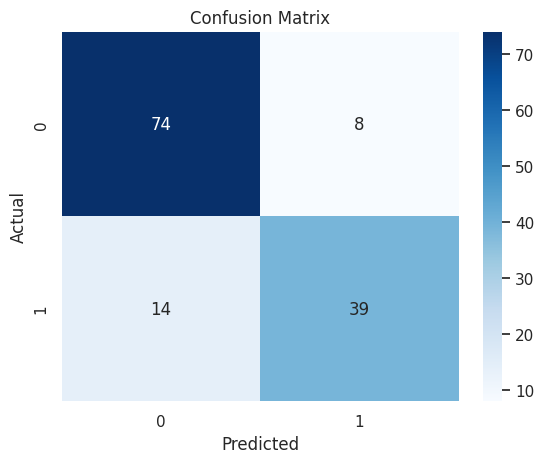

In [36]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Accuracy: 0.837037037037037


In [38]:
prec = precision_score(y_test, y_pred)
print("Precision:",prec)

Precision: 0.8297872340425532


In [39]:
rec = recall_score(y_test, y_pred)
print("Recall (Sensitivity):",rec)

Recall (Sensitivity): 0.7358490566037735


In [40]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)

F1 Score: 0.78


In [41]:
roc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:",roc)

ROC-AUC: 0.8191440404970087


In [42]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        82
           1       0.83      0.74      0.78        53

    accuracy                           0.84       135
   macro avg       0.84      0.82      0.83       135
weighted avg       0.84      0.84      0.84       135



Predict Survival for a Single New Passenger


# Example:
 Pclass=2, Sex=male(0), Age=30, Fare=20.5, SibSp=1, Parch=0, Title=1

In [43]:
sample_passenger = pd.DataFrame(
    [[2, 0, 30, 20.5, 1, 0, 1]],
    columns=X.columns
)

In [44]:
sample_passenger_scaled = scaler.transform(sample_passenger)

In [45]:
predicted_survival = knn.predict(sample_passenger_scaled)

In [46]:
print(f"Predicted Survival for unseen Passenger: {predicted_survival[0]} (0=Not Survived, 1=Survived)")

Predicted Survival for unseen Passenger: 1 (0=Not Survived, 1=Survived)


In [47]:
# Make sure X_test is a DataFrame with same columns as training data
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [48]:
X_test_scaled = scaler.transform(X_test_df)

In [49]:
y_pred_test = knn.predict(X_test_scaled)

Confusion Matrix:
[[66 16]
 [12 41]]


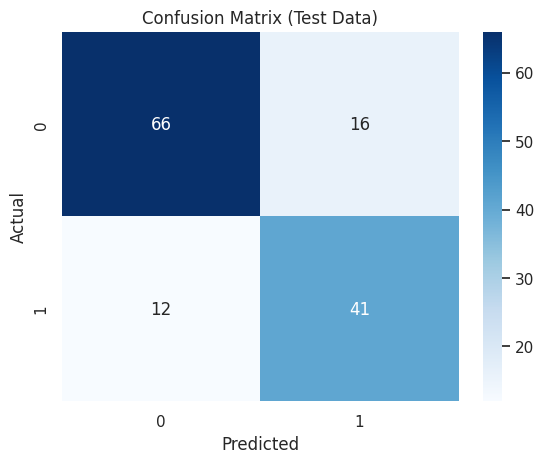

In [50]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [51]:
# Accuracy
acc = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {acc:.3f}")


Test Accuracy: 0.793


In [52]:
# Detailed Report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        82
           1       0.72      0.77      0.75        53

    accuracy                           0.79       135
   macro avg       0.78      0.79      0.79       135
weighted avg       0.80      0.79      0.79       135

